In [19]:
conda install -c mikesilva xgboost

Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
import pydotplus
adult=pd.read_csv('C://Users//user//Desktop//資料探勘作業一//adult.csv',sep='\t')

adult

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,output
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [21]:
from sklearn.preprocessing  import LabelEncoder

le=LabelEncoder()

adult['workclass']=le.fit_transform(adult['workclass'])
adult['education']=le.fit_transform(adult['education'])
adult['marital-status']=le.fit_transform(adult['marital-status'])
adult['occupation']=le.fit_transform(adult['occupation'])
adult['relationship']=le.fit_transform(adult['relationship'])
adult['race']=le.fit_transform(adult['race'])
adult['sex']=le.fit_transform(adult['sex'])
adult['native-country']=le.fit_transform(adult['native-country'])
adult['output'] = le.fit_transform(adult['output'])
adult


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,output
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32557,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32558,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32559,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


In [41]:
from sklearn.model_selection import train_test_split
X = adult.drop(labels=['hours-per-week'],axis=1).values
y = adult['hours-per-week'].values


In [42]:
from xgboost import XGBRegressor
# 建立 XGBClassifier 模型
xgboostModel = XGBRegressor(n_estimators=100, learning_rate= 0.3)
# 使用訓練資料訓練模型
xgboostModel.fit(X, y)
# 使用訓練資料預測分類
#predicted = xgboostModel.predict(X)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.3, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [24]:
A=pd.read_csv('C:\\Users\\user\\Desktop\\adult.test.csv',sep='\t')
A

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,output
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [25]:
le=LabelEncoder()

A['workclass']=le.fit_transform(A['workclass'])
A['education']=le.fit_transform(A['education'])
A['marital-status']=le.fit_transform(A['marital-status'])
A['occupation']=le.fit_transform(A['occupation'])
A['relationship']=le.fit_transform(A['relationship'])
A['race']=le.fit_transform(A['race'])
A['sex']=le.fit_transform(A['sex'])
A['native-country']=le.fit_transform(A['native-country'])
A['output'] = le.fit_transform(A['output'])
A

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,output
0,25,4,226802,1,7,4,7,3,2,1,0,0,40,38,0
1,38,4,89814,11,9,2,5,0,4,1,0,0,50,38,0
2,28,2,336951,7,12,2,11,0,4,1,0,0,40,38,1
3,44,4,160323,15,10,2,7,0,2,1,7688,0,40,38,1
4,18,0,103497,15,10,4,0,3,4,0,0,0,30,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,4,215419,9,13,0,10,1,4,0,0,0,36,38,0
16277,64,0,321403,11,9,6,0,2,2,1,0,0,40,38,0
16278,38,4,374983,9,13,2,10,0,4,1,0,0,50,38,0
16279,44,4,83891,9,13,0,1,3,1,1,5455,0,40,38,0


In [29]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaler.fit(A.drop('hours-per-week',axis=1))
#scaled_features = scaler.transform(A.drop('hours-per-week',axis=1))
#A_feat = pd.DataFrame(scaled_features,columns=A.columns[:-1])
#A_feat.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,-0.994129,0.085414,0.353474,-2.387116,-1.196864,0.905239,0.097403,0.981172,-1.990286,0.706521,-0.142662,-0.218062,0.286402,-0.556137
1,-0.055417,0.085414,-0.942391,0.188304,-0.417886,-0.418769,-0.374987,-0.902239,0.389812,0.706521,-0.142662,-0.218062,0.286402,-0.556137
2,-0.777503,-1.265356,1.395450,-0.841864,0.750582,-0.418769,1.042181,-0.902239,0.389812,0.706521,-0.142662,-0.218062,0.286402,1.798118
3,0.377835,0.085414,-0.275397,1.218472,-0.028397,-0.418769,0.097403,-0.902239,-1.990286,0.706521,0.871091,-0.218062,0.286402,1.798118
4,-1.499590,-2.616126,-0.812954,1.218472,-0.028397,0.905239,-1.555960,0.981172,0.389812,-1.415387,-0.142662,-0.218062,0.286402,-0.556137


In [43]:
X = A.drop(['hours-per-week'],axis=1)
y = A['hours-per-week']

In [44]:
B=xgboostModel.predict(X)
B

array([38.05119 , 47.27326 , 48.13408 , ..., 43.536427, 39.576195,
       51.817734], dtype=float32)

In [ ]:
print('訓練集: ',xgboostModel.score(X_train,y_train))
print('測試集: ',xgboostModel.score(X_test,y_test))


In [ ]:
adult_test=pd.DataFrame(X_test, columns= ["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country"])
adult_test['y'] = y_test
pred = xgboostModel.predict(X_test)
adult_test['Predict'] = pred

In [49]:
xgboostModel.feature_importances_

array([0.11550893, 0.05593645, 0.02763993, 0.03277534, 0.04791304,
       0.03309333, 0.06172256, 0.09425142, 0.03136098, 0.20904817,
       0.03174808, 0.02917714, 0.02882755, 0.20099713], dtype=float32)

In [ ]:
sns.lmplot(x="education-num", y="relationship", hue="y", data=adult_test, fit_reg=False, legend=False)
plt.legend(title='target', loc='upper left', labels=["no","yes"])
plt.show()

In [45]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y,B)
print("MAE: ",mae)

MAE:  7.442137931914875


In [46]:
import math
MSE = np.square(np.subtract(y,B)).mean() 
RMSE = math.sqrt(MSE)
print("RMSE: ",RMSE)


RMSE:  10.899580197329119


In [47]:
mape =np.mean(np.abs((y - B) / y)) * 100
print("MAPE: ",mape)

MAPE:  29.64410912837472


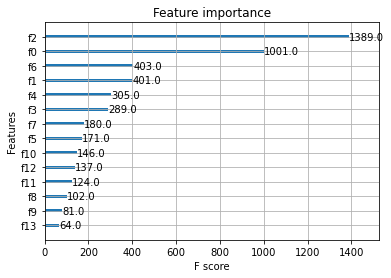

In [50]:
from xgboost import plot_importance
from matplotlib import pyplot
plot_importance(xgboostModel)
pyplot.show()
